In [ ]:
# 傅里叶变换

import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10*math.pi, 10*math.pi, 400) #从(0,2pi)均匀取50个点
k1 = 0.5
k2 = 3
y1 = []
y2 = []
y3 = []

for i in range(len(x)):
    y1.append( math.cos(k1*x[i]) )
    y2.append( math.cos(k2*x[i]) )
    y3.append( math.cos(k1*x[i]) + math.cos(k2*x[i]) )

    
fig = plt.figure(num=1, figsize=(10,10), dpi=100)
plt.subplots_adjust(hspace=0.3)

plt.subplot(4,1,1)
ax = plt.gca() #获取当前figure的四个轴
ax.xaxis.set_ticks_position("bottom") #将x轴作为底部脊梁
ax.spines['bottom'].set_position( ('data',0) ) #设置脊梁的位置
ax.yaxis.set_ticks_position("left") #将y轴作为左侧脊梁
ax.spines['left'].set_position( ('data',0) ) #设置脊梁的位置

ax.set_title('cos('+str(k1)+'x)')
plt.plot(x,y1, color='red', linewidth=3.0)

plt.subplot(4,1,2)
ax = plt.gca()
ax.set_title('cos('+str(k2)+'x)')
plt.plot(x,y2, color='green', linewidth=3.0)

plt.subplot(4,1,3)
ax = plt.gca()
ax.set_title('cos('+str(k1)+'x) + cos('+str(k2)+'x)')
plt.plot(x,y3, color='blue', linewidth=3.0)

plt.subplot(4,1,4)
ax = plt.gca()
ax.set_title('put 3 wave together')
plt.plot(x,y1, color='red', linewidth=2.0)
plt.plot(x,y2, color='green', linewidth=1.0)
plt.plot(x,y3, color='blue', linewidth=2.3)

plt.show()


In [ ]:
# 动图

import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation
%matplotlib notebook

fig, ax = plt.subplots() #生成轴和fig，可迭代的对象

x = np.arange(0, 3*np.pi, 0.1)
line, = ax.plot(x, np.sin(x), 'ro')

# 更新数据
def animate(i):
    line.set_ydata(np.sin(x+i/10.0))
    return line,

# 初始化画布
def init():
    line.set_ydata(np.sin(x))
    return line,

ani = animation.FuncAnimation(fig=fig, func = animate, frames = 25, init_func = init, interval = 200, blit = False)

plt.show()

In [ ]:
# 二维波导中的电磁波

import matplotlib.pyplot as plt
import numpy as np
import math

y1 = np.linspace(0, math.pi, 200)
#y2 = np.linspace(5*math.pi, 10*math.pi, 200)
x1 = []
x2 = []
x3 = []

for i in range(200):
    x1.append( math.sin(y1[i]) )
    x2.append( math.sin(2*y1[i])+2.5)
    x3.append( math.sin(3*y1[i])+5)

#fig = plt.figure(num=1, figsize=(10,10), dpi=100)
plt.plot(x1,y1, color='red', linewidth=2.0)
plt.plot(x2,y1, color='green', linewidth=2.0)
plt.plot(x3,y1, color='blue', linewidth=2.0)

plt.yticks([0, math.pi],[0,'a'], fontsize=20)
plt.xticks([0, 2.5, 5],["$n=1$","$n=2$","$n=3$"])

plt.vlines(0,   0, math.pi, linestyles="dashed",linewidth=1.0)
plt.vlines(2.5, 0, math.pi, linestyles="dashed",linewidth=1.0)
plt.vlines(5,   0, math.pi, linestyles="dashed",linewidth=1.0)

plt.title("$π$                  $2π$                  $3π$       ")
plt.show()
#plt.savefig('4-9_二维波导驻波.png')

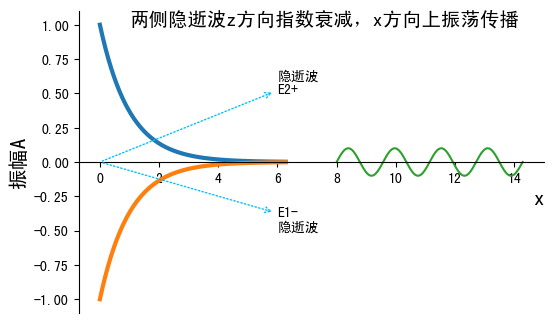

In [25]:
# 表面等离激元，两侧都是指数衰减的隐逝波

import matplotlib.pyplot as plt
import numpy as np
import math
plt.figure(dpi = 100)

# z轴坐标
z = np.linspace(0, 2*math.pi, 200)

# 界面两侧隐逝波的振幅
A_plus = []  #E2+
A_minus = [] #E1-

# z方向指数衰减
for i in range(len(z)):
    A_plus.append(math.pow(math.e, -z[i]))
    A_minus.append(-math.pow(math.e, -z[i]))

# x，y轴标签
plt.xlabel("x",fontsize=15,loc="right")
plt.ylabel("振幅A",fontsize=15)

# 绘制振幅在z方向传播衰减
plt.plot(z, A_plus, linewidth=3)
plt.plot(z, A_minus, linewidth=3)

# 设置边框位置
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))

# 正弦曲线表示x方向振荡传播
sinx = []
for i in range(len(z)):
    sinx.append(0.1*math.sin(4*z[i]))
plt.plot(z+8,sinx)

# 绘制隐逝波示意图
ax.annotate("隐逝波\nE2+", xy=(0,0), xytext=(6,0.5),
            arrowprops=dict(arrowstyle="<-", color="deepskyblue", linestyle=":") )

ax.annotate("E1-\n隐逝波", xy=(0,0), xytext=(6,-0.5),
            arrowprops=dict(arrowstyle="<-", color="deepskyblue", linestyle=":") )

plt.text(1, 1, "两侧隐逝波z方向指数衰减，x方向上振荡传播", size = 14)

plt.savefig("4-9_表面等离激元.png",bbox_inches='tight')
plt.show()

In [ ]:
# 带箭头的x-y坐标系

import matplotlib.pyplot as plt
import numpy as np
import math
# 引入axisartist工具
import mpl_toolkits.axisartist as axisartist

# 创建画布
# fig = plt.figure(figsize=(8,8))
fig = plt.figure(dpi = 100)

# 使用axisartist.Subplot 方法创建一个绘图区对象 ax
ax = axisartist.Subplot(fig, 111)

# 将绘图区对象添加到画布中
fig.add_axes(ax)

# 设置绘图区原来所有坐标轴隐藏
ax.axis[:].set_visible(False)

# 添加新的坐标轴 
ax.axis["x"] = ax.new_floating_axis(0,0) #第一个0代表水平直线，第二个0代表直线经过0点
ax.axis["y"] = ax.new_floating_axis(1,0) #1代表竖直直线，0代表直线经过0点

# 给 x轴,y轴 加上箭头
ax.axis["x"].set_axisline_style("->",size =1.0)#空心箭头
ax.axis["y"].set_axisline_style("-|>",size=1.0)#实心箭头

# 设置刻度显示方向
ax.axis["x"].set_axis_direction("top")
ax.axis["y"].set_axis_direction("right")

# 绘制曲线：
z = np.linspace(0, 2*math.pi, 200)
A_plus = []  #A+
A_minus = [] #A-
for i in range(len(z)):
    A_plus.append(math.pow(math.e, -z[i]))
    A_minus.append(-math.pow(math.e, -z[i]))

plt.xlabel("x",fontsize=15)
plt.ylabel("振幅A",fontsize=15)

plt.plot(z, A_plus, linewidth=3)
plt.plot(z, A_minus, linewidth=3)

sinx = []
for i in range(len(z)):
    sinx.append(0.1*math.sin(4*z[i]))
    
plt.plot(z+8,sinx)

plt.text(1, 1, "两侧隐逝波指数衰减，x方向上振荡传播", size = 15)

plt.show()